## **Linear Regression Project on California Housing dataset**

1.Load Boston dataset from sklearn and Exploration on it

In [1]:
import pandas as pd
from sklearn.datasets import fetch_california_housing
#  housing = fetch_california_housing()

# Load  dataset using fetch_california_housing() methode
housing_california = fetch_california_housing()
print(f'type ={type(housing_california)}')

df_housing_california = pd.DataFrame(housing_california.data, columns=housing_california.feature_names)
df_housing_california['PRICE'] = housing_california.target

# Display dataset
df_housing_california

type =<class 'sklearn.utils._bunch.Bunch'>


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,PRICE
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


# **Preprocessing Data **

In [2]:
print(df_housing_california.head())
print(f'df_housing_california shape: {df_housing_california.shape}')
print(f'df_housing_california columns: \n{df_housing_california.columns}')
print(f'df_housing_california describe: \n{df_housing_california.describe()}')
print(f'df_housing_california info: \n {df_housing_california.info()}')
print(f'df_housing_california isnull: \n{df_housing_california.isnull().sum()}')
print(f'df_housing_california dtypes: \n {df_housing_california.dtypes}')
print(f'df_housing_california corr: \n{df_housing_california.corr()}')
print(f'df_housing_california nunique: \n{df_housing_california.nunique()}')
print(f'df_housing_california memory_usage: \n{df_housing_california.memory_usage()}')
print(f'df_housing_california memory_usage(deep): \n{df_housing_california.memory_usage(deep=True)}')

   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  PRICE  
0    -122.23  4.526  
1    -122.22  3.585  
2    -122.24  3.521  
3    -122.25  3.413  
4    -122.25  3.422  
df_housing_california shape: (20640, 9)
df_housing_california columns: 
Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude', 'PRICE'],
      dtype='object')
df_housing_california describe: 
             MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean

# Select Feature and Split: MedInc because it has highest correlation with price

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler


# Make X , Y

df_housing_california['PRICE'] = housing_california.target

# Select the feature and target variable
X = df_housing_california['MedInc']
y = df_housing_california['PRICE']
# print(f'x = {X}')
# print(f'y = {y}')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
print(f'x_train = \n{X_train}')
print(f'x_test = \n{X_test}')
# print(f'y_train = \n{y_train}')
# print(f'y_test = \n{y_test}')
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.values.reshape(-1,1))
X_test_scaled = scaler.transform(X_test.values.reshape(-1,1))
print(f'X_train.shape:{X_train.shape}, X_test.shape:{X_test.shape}, y_train.shape:{y_train.shape}, y_test.shape:{y_test.shape}')
print(f'X_train_scaled.shape:{X_train_scaled.shape}, X_test_scaled.shape:{X_test_scaled.shape}, y_train.shape:{y_train.shape}, y_test.shape:{y_test.shape}')
print(f'x_train_scaled = {X_train_scaled}')
print(f'x_test_scaled = {X_test_scaled}')
# print(f'y_train = {y_train}')
# print(f'y_test = {y_test}')

x_train = 
8158     4.2143
18368    5.3468
19197    3.9191
3746     6.3703
13073    2.3684
          ...  
11284    6.3700
11964    3.0500
5390     2.9344
860      5.7192
15795    2.5755
Name: MedInc, Length: 15480, dtype: float64
x_test = 
20046    1.6812
3024     2.5313
15663    3.4801
20484    5.7376
9814     3.7250
          ...  
5363     6.6260
19755    2.1898
4885     2.1667
13043    6.8869
8583     6.6321
Name: MedInc, Length: 5160, dtype: float64
X_train.shape:(15480,), X_test.shape:(5160,), y_train.shape:(15480,), y_test.shape:(5160,)
X_train_scaled.shape:(15480, 1), X_test_scaled.shape:(5160, 1), y_train.shape:(15480,), y_test.shape:(5160,)
x_train_scaled = [[ 0.17648852]
 [ 0.77137436]
 [ 0.02142423]
 ...
 [-0.49582442]
 [ 0.96699069]
 [-0.68434939]]
x_test_scaled = [[-1.15411223]
 [-0.70756701]
 [-0.20917611]
 ...
 [-0.89908611]
 [ 1.58036659]
 [ 1.44652384]]


# Biuld and Train model

In [4]:
model_linear = LinearRegression()
model_linear.fit(X_train_scaled, y_train)

LinearRegression()

# Make Prediction

In [5]:
y_pred = model_linear.predict(X_test_scaled)
print(f'y_pred = {y_pred}')
print(f'y_test = {y_test}')

y_pred = [1.15221696 1.50745749 1.90394286 ... 1.35509812 3.3275794  3.22110336]
y_test = 20046    0.47700
3024     0.45800
15663    5.00001
20484    2.18600
9814     2.78000
          ...   
5363     5.00001
19755    0.63200
4885     1.17700
13043    2.63100
8583     4.81500
Name: PRICE, Length: 5160, dtype: float64


# Evaluate The Model

In [6]:
mse = mean_squared_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Squre Error    : {mse}')
print(f'R-Squred            : {r2}')
print(f'nMean Absolute Error: {mae}')

Mean Squre Error    : 0.7001962368292408
R-Squred            : 0.47083837938023376
nMean Absolute Error: 0.6268970462646626


# Visualize The Rezult

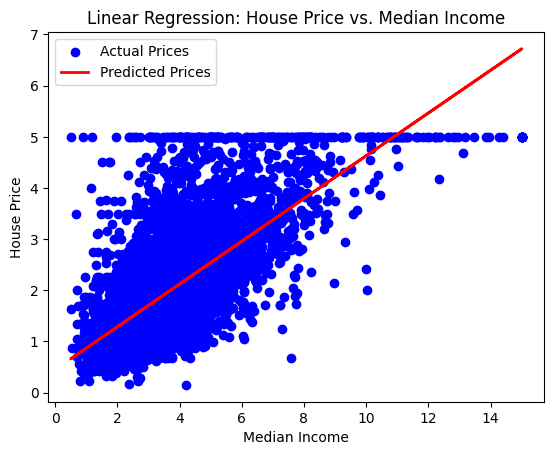

In [7]:
plt.scatter(X_test, y_test, color='blue', label='Actual Prices')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Predicted Prices')
plt.xlabel('Median Income')
plt.ylabel('House Price')
plt.title('Linear Regression: House Price vs. Median Income')

plt.legend()
plt.show()


# Combining 3 features('MedInc', 'AveRooms', 'HouseAge') for improving model_linear

In [8]:
# Combine features
X_combined = df_housing_california[['MedInc', 'AveRooms', 'HouseAge']]

# Split the data
X_train_combined, X_test_combined, y_train_combined, y_test_combined = train_test_split(X_combined, y, test_size=0.25, random_state=42)

# Build and train the model
model_combined = LinearRegression()
model_combined.fit(X_train_combined, y_train_combined)

# Make predictions
y_pred_combined = model_combined.predict(X_test_combined)

# Evaluate the model
mse_combined = mean_squared_error(y_test_combined, y_pred_combined)
r2_combined = r2_score(y_test_combined, y_pred_combined)
mae_combined = mean_absolute_error(y_test_combined, y_pred_combined)

print(f'Mean Squared Error (Combined): {mse_combined}')
print(f'R-squared (Combined)         : {r2_combined}')
print(f'Mean Absolut Error (combined): {mae_combined}')


Mean Squared Error (Combined): 0.6459618355890845
R-squared (Combined)         : 0.5118251230159077
Mean Absolut Error (combined): 0.5991743182745098


# Feature Enigineering.Interaction Features Style. df['MedInc'] * df['HouseAge']

In [9]:
# InterAction1 features
df_housing_california['MedInc_HouseAge'] = df_housing_california['MedInc'] * df_housing_california['HouseAge']
X_IntAct1 = df_housing_california['MedInc_HouseAge']

# Split the data
X_train_IntAct1, X_test_IntAct1, y_train_IntAct1, y_test_IntAct1 = train_test_split(X_IntAct1, y, test_size=0.25, random_state=42)
X_train_IntAct1 = X_train_IntAct1.values.reshape(-1, 1)
X_test_IntAct1 = X_test_IntAct1.values.reshape(-1, 1)

# Build and train the model
model_IntAct1 = LinearRegression()
model_IntAct1.fit(X_train_IntAct1, y_train_IntAct1)

# Make predictions
y_pred_IntAct1 = model_IntAct1.predict(X_test_IntAct1)

# Evaluate the model
mse_IntAct1 = mean_squared_error(y_test_IntAct1, y_pred_IntAct1)
r2_IntAct1 = r2_score(y_test_IntAct1, y_pred_IntAct1)
mae_IntAct1 = mean_absolute_error(y_test_IntAct1, y_pred_IntAct1)

print(f'Mean Squared Error (IntAct1) : {mse_IntAct1}')
print(f'R-squared (IntAct1)          : {r2_IntAct1}')
print(f'Mean Absolute Error (IntAct1): {mae_IntAct1}')


Mean Squared Error (IntAct1) : 0.8493489887287555
R-squared (IntAct1)          : 0.35811867629749194
Mean Absolute Error (IntAct1): 0.715269580432741


# Feature Enigineering. InteractionFeaturesStyle2.df['AveRooms'] * df['HouseAge]

In [10]:
# InterAction2 features
df_housing_california['AveRooms_HouseAge'] = df_housing_california['AveRooms'] * df_housing_california['HouseAge']
X_IntAct2 = df_housing_california['AveRooms_HouseAge']

# Split the data
X_train_IntAct2, X_test_IntAct2, y_train_IntAct2, y_test_IntAct2 = train_test_split(X_IntAct2, y, test_size=0.25, random_state=42)
X_train_IntAct2 = X_train_IntAct2.values.reshape(-1, 1)
X_test_IntAct2 = X_test_IntAct2.values.reshape(-1, 1)

# Build and train the model
model_IntAct2 = LinearRegression()
model_IntAct2.fit(X_train_IntAct2, y_train_IntAct2)

# Make predictions
y_pred_IntAct2 = model_IntAct2.predict(X_test_IntAct2)

# Evaluate the model
mse_IntAct2 = mean_squared_error(y_test_IntAct2, y_pred_IntAct2)
r2_IntAct2 = r2_score(y_test_IntAct2, y_pred_IntAct2)
mae_IntAct2 = mean_absolute_error(y_test_IntAct2,y_pred_IntAct2)

print(f'Mean Squared Error (IntAct1) : {mse_IntAct2}')
print(f'R-squared (IntAct2)          : {r2_IntAct2}')
print(f'Mean Absolute Error (IntAct2): {mae_IntAct2}')

Mean Squared Error (IntAct1) : 1.2774818800086682
R-squared (IntAct2)          : 0.03456438869346601
Mean Absolute Error (IntAct2): 0.8812515362801716
